In [1]:
import pandas as pd
import benchmax.evaluation as ev
import matplotlib.pyplot as plt
import tikzplotlib


In [2]:
def get_data(solvers):
    param = {}
    for solver in solvers:
        param["stats_smtrat_15m_6Gi_"+solver+".xml"] = {"smtrat-static": solver, "smtrat-"+solver: solver}
    return ev.xmls_to_pandas(param,['mcsat-explanation-nlsat_explanation_called','mcsat-explanation-onecellcad_explanation_called','mcsat-explanation-fm_explanation_called'])

df = get_data(["MCSATNL","MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13","MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"])

for solver in ["MCSATNL"]:
    df.loc[:,(solver,'cells_constructed')] = df[(solver,'mcsat-explanation-nlsat_explanation_called')].fillna(0).astype(int)

for solver in ["MCSATOCNNASC","MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13"]:
    df.loc[:,(solver,'cells_constructed')] = df[(solver,'mcsat-explanation-onecellcad_explanation_called')].fillna(0).astype(int)
    
for solver in ["MCSATFMICPVSNL","MCSATFMICPVSOCNNASC","MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"]:
    df.loc[:,(solver,'cells_constructed')] = df[(solver,'mcsat-explanation-fm_explanation_called')].fillna(0).astype(int)

df = df.join(ev.virtual_best(df, ["MCSATOCLWH11","MCSATOCLWH12","MCSATOCLWH13"], "VB", ['cells_constructed']))
df = df.join(ev.virtual_best(df, ["MCSATFMICPVSOCLWH11","MCSATFMICPVSOCLWH12","MCSATFMICPVSOCLWH13"], "VB+", ['cells_constructed']))
df

MCSATNL          \
                                     answer runtime   
20161105-Sturm-MBO/mbo_E1.smt2       memout   905.0   
20161105-Sturm-MBO/mbo_E10.smt2     timeout   910.0   
20161105-Sturm-MBO/mbo_E10E11.smt2   memout   905.0   
20161105-Sturm-MBO/mbo_E10E12.smt2   memout   905.0   
20161105-Sturm-MBO/mbo_E10E13.smt2   memout   905.0   
...                                     ...     ...   
zankl/matrix-5-all-5.smt2           timeout   910.0   
zankl/matrix-5-all-6.smt2           timeout   910.0   
zankl/matrix-5-all-7.smt2           timeout   910.0   
zankl/matrix-5-all-8.smt2           timeout   910.0   
zankl/matrix-5-all-9.smt2           timeout   910.0   

                                                                               \
                                   mcsat-explanation-nlsat_explanation_called   
20161105-Sturm-MBO/mbo_E1.smt2                                           None   
20161105-Sturm-MBO/mbo_E10.smt2                                             1   
20161105-Sturm-MBO/mbo_E10E11.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E12.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E13.smt2                                       None   
...                                                                       ...   
zankl/matrix-5-all-5.smt2                                                   4   
zankl/matrix-5-all-6.smt2                                                   7   
zankl/matrix-5-all-7.smt2                                                   7   
zankl/matrix-5-all-8.smt2                                                   1   
zankl/matrix-5-all-9.smt2                                                   2   

                                   MCSATOCNNASC          \
                                         answer runtime   
20161105-Sturm-MBO/mbo_E1.smt2           memout   905.0   
20161105-Sturm-MBO/mbo_E10.smt2         timeout   910.0   
20161105-Sturm-MBO/mbo_E10E11.smt2       memout   905.0   
20161105-Sturm-MBO/mbo_E10E12.smt2       memout   905.0   
20161105-Sturm-MBO/mbo_E10E13.smt2       memout   905.0   
...                                         ...     ...   
zankl/matrix-5-all-5.smt2               timeout   910.0   
zankl/matrix-5-all-6.smt2               timeout   910.0   
zankl/matrix-5-all-7.smt2               timeout   910.0   
zankl/matrix-5-all-8.smt2               timeout   910.0   
zankl/matrix-5-all-9.smt2               timeout   910.0   

                                                                               \
                                   mcsat-explanation-nlsat_explanation_called   
20161105-Sturm-MBO/mbo_E1.smt2                                           None   
20161105-Sturm-MBO/mbo_E10.smt2                                          None   
20161105-Sturm-MBO/mbo_E10E11.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E12.smt2                                       None   
20161105-Sturm-MBO/mbo_E10E13.smt2                                       None   
...                                                                       ...   
zankl/matrix-5-all-5.smt2                                                   4   
zankl/matrix-5-all-6.smt2                                                   6   
zankl/matrix-5-all-7.smt2                                                   7   
zankl/matrix-5-all-8.smt2                                                   1   
zankl/matrix-5-all-9.smt2                                                   2   

                                                                                    \
                                   mcsat-explanation-onecellcad_explanation_called   
20161105-Sturm-MBO/mbo_E1.smt2                                                None   
20161105-Sturm-MBO/mbo_E10.smt2                                                  1   
20161105-Sturm-MBO/mbo_E10E11.smt2                                            None   
20161105-Sturm

Text(0, 0.5, 'VB number of cells')

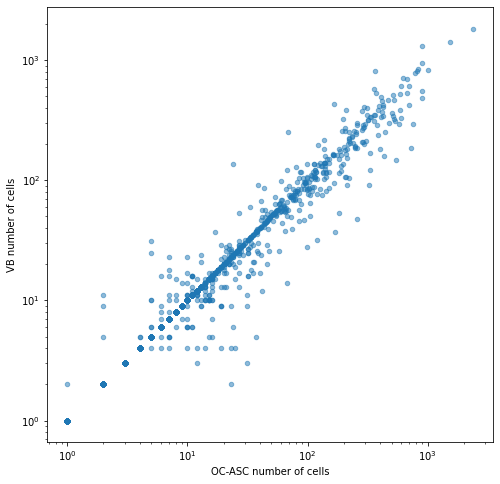

In [3]:
plt.rcParams["figure.figsize"] = (8,8)
ax = ev.scatter_plot(df,"MCSATOCNNASC","VB","cells_constructed", True)# , ("MCSATOCNNASC", "answer"), {'sat': 'green', 'unsat': 'red'})
#ax.set_xlim(0,2500)
#ax.set_ylim(0,2500)
ax.axis('equal')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
ax.set_xlabel("OC-ASC number of cells")
ax.set_ylabel("VB number of cells")

#ev.save_scatter(ax, "../plots/scatter_cells.tex",6)

Text(0, 0.5, 'VB+ number of cells')

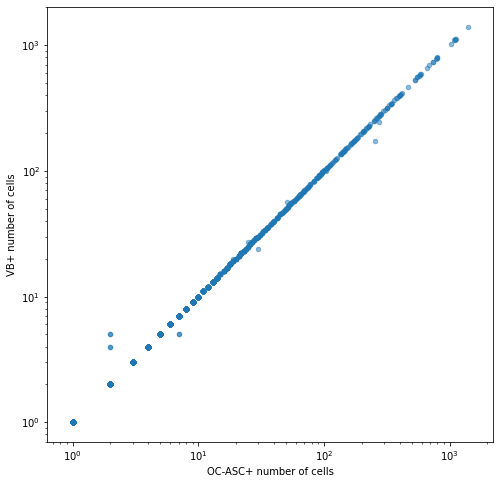

In [4]:
plt.rcParams["figure.figsize"] = (8,8)
ax = ev.scatter_plot(df,"MCSATFMICPVSOCNNASC","VB+","cells_constructed", True)# , ("MCSATOCNNASC", "answer"), {'sat': 'green', 'unsat': 'red'})
#ax.set_xlim(0,2500)
#ax.set_ylim(0,2500)
ax.axis('equal')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
ax.set_xlabel("OC-ASC+ number of cells")
ax.set_ylabel("VB+ number of cells")

Text(0, 0.5, 'VB+ running time (s)')

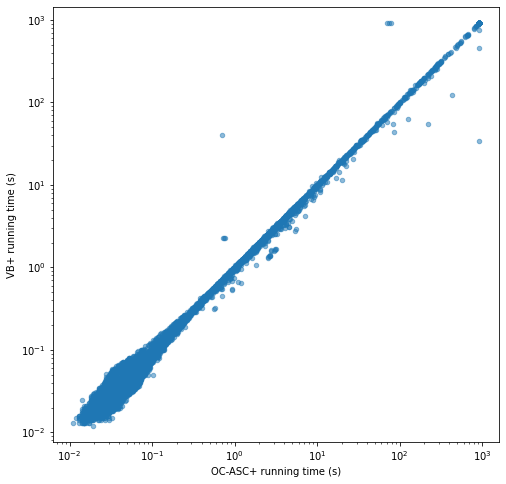

In [5]:
plt.rcParams["figure.figsize"] = (8,8)
ax = ev.scatter_plot(df,"MCSATFMICPVSOCNNASC","VB+","runtime", False) # , ("VB+", "answer"), {'sat': 'green', 'unsat': 'red'}
ax.set_xlim(0,950)
ax.set_ylim(0,950)
ax.axis('equal')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
ax.set_xlabel("OC-ASC+ running time (s)")
ax.set_ylabel("VB+ running time (s)")

#tikzplotlib.save("../plots/scatter_runtime_plus.tex")

Text(0, 0.5, 'VB running time (s)')

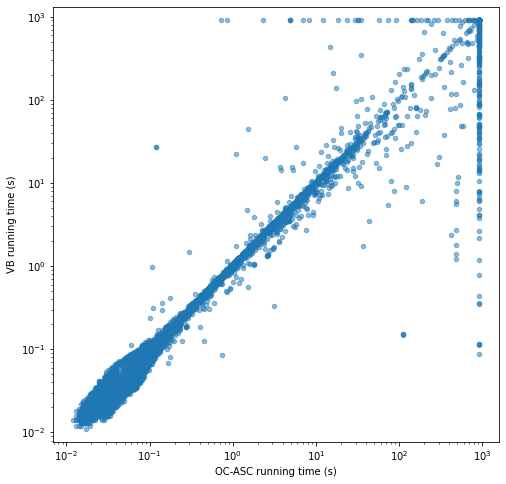

In [6]:
plt.rcParams["figure.figsize"] = (8,8)
ax = ev.scatter_plot(df,"MCSATOCNNASC","VB","runtime", False) # , ("VB+", "answer"), {'sat': 'green', 'unsat': 'red'}
#ax.set_xlim(0,950)
#ax.set_ylim(0,950)
ax.axis('equal')
plt.xscale('log', base=10)
plt.yscale('log', base=10)
ax.set_xlabel("OC-ASC running time (s)")
ax.set_ylabel("VB running time (s)")
#ev.scatter_equal_line(ax)

#ev.save_scatter(ax, "../plots/scatter_runtime.tex",6)